### Mengimport Library dan Module yang diperlukan dalam pengerjaan

In [77]:
import pandas as pd
import seaborn as sns
import warnings

In [78]:
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv("netflix daily top 10 bersih.csv", sep = ";")

In [80]:
df.head()

,Unnamed: 0,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,0,01/04/2020,1,1.0,1.000000,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,1,01/04/2020,2,2.0,3.938378,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2,01/04/2020,3,3.0,2.000000,All American,TV Show,Yes,"Mar 28, 2019",9,76
3,3,01/04/2020,4,4.0,3.938378,Blood Father,Movie,Yes,"Mar 26, 2020",5,30
4,4,01/04/2020,5,5.0,4.000000,The Platform,Movie,Yes,"Mar 20, 2020",9,55


### Subset dan Data Scalling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
df_subset = df[['Year to Date Rank', 'Rank']]

In [83]:
ss = StandardScaler()

In [84]:
x_scaled = ss.fit_transform(df_subset)

### Melakukan Pendekatan Unsupervised Learning dengan Algoritma K-Means

In [85]:
from sklearn.cluster import KMeans

#### Mengecek Data Unik pada Tipe Data Kategorikal (Object) Untuk digunakan pada n_clusters

In [60]:
df['Type'].unique()

array(['TV Show', 'Movie', 'StandUp Comedy', 'Concert/Perf…'],
      dtype=object)

In [61]:
model_kmeans = KMeans(n_clusters = 4)

In [62]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=4)

In [63]:
labels = model_kmeans.labels_

In [64]:
print(labels)

[3 3 3 ... 2 2 2]


### Membuat Cross_tab untuk membandingkan antar cluster

#### Membuat DataFrame dengan Labels dan Type dari dataset yang telah dibaca sebagai kolom

In [87]:
df_kmeans = pd.DataFrame({'labels' : labels, 'Type' : df.Type})

#### Membuat Crosstab

In [88]:
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['Type'])

In [67]:
print(ct1)

Type    Concert/Perf…  Movie  StandUp Comedy  TV Show
labels                                               
0                   2    828              16     1208
1                   0    741              10     1081
2                   0    472               5      914
3                   0    570              10     1243


### Visualisasi Centroid

In [68]:
import matplotlib.pyplot as plt

In [69]:
plt.style.use('ggplot')

#### Untuk mengambil semua baris pada kolom tertentu (berbentuk array)

In [89]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

#### Untuk Menampung Koordinat dari semua Centroid

In [90]:
centroids = model_kmeans.cluster_centers_

#### Memisahkan Centroid Koordinat x dan Koordinat y

In [91]:
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

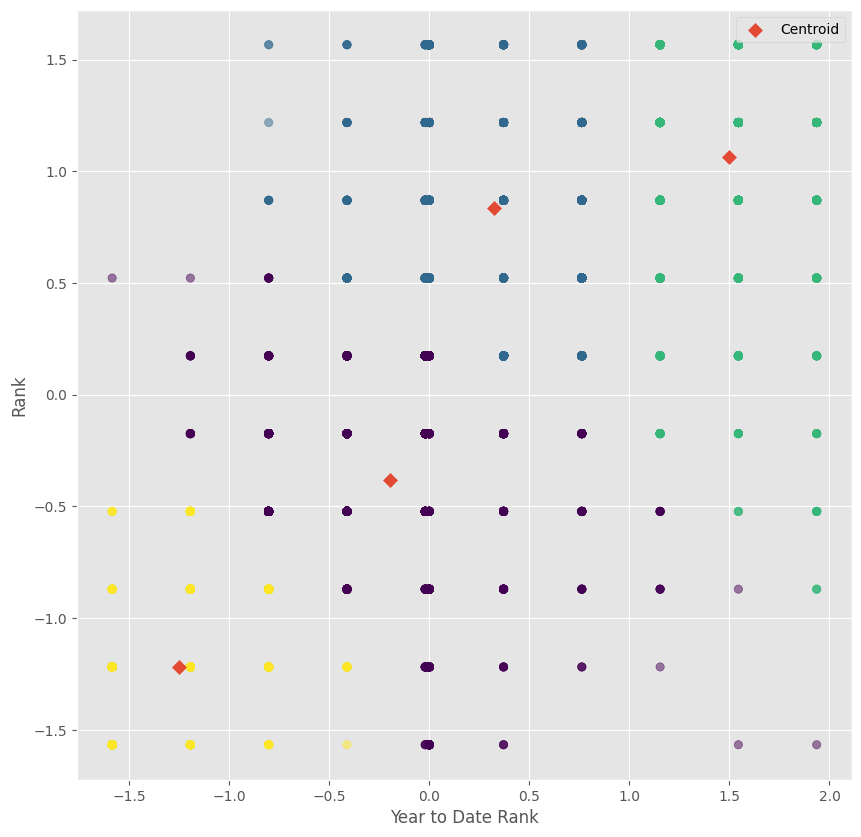

In [93]:
# Visualisasi Cluster
plt.figure(figsize = (10, 10))

# Titik-titik data
plt.scatter(xs, ys, alpha = 0.5, c = labels)

# Titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = 'Centroid', marker = 'D', s = 50)

# Beri label
plt.xlabel ("Year to Date Rank")
plt.ylabel ("Rank")

plt.legend()
plt.show()

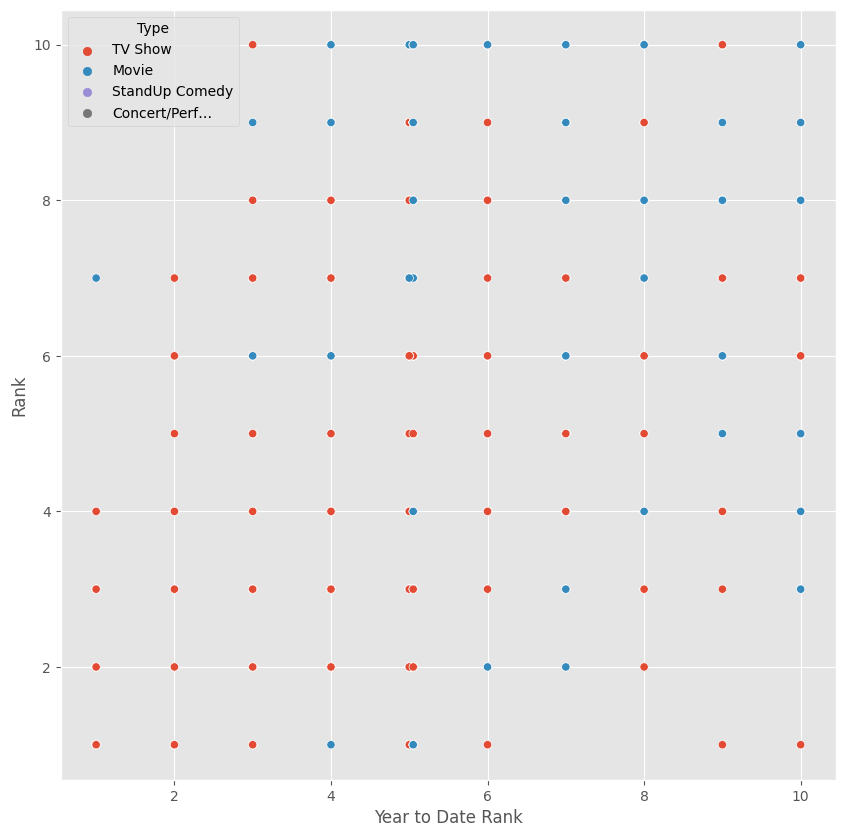

In [94]:
# label Actual
plt.figure(figsize = (10, 10))

df_aktual = df[['Year to Date Rank', 'Rank', 'Type']]
sns.scatterplot(x = "Year to Date Rank", y = "Rank", data = df_aktual, hue = "Type")
plt.show()

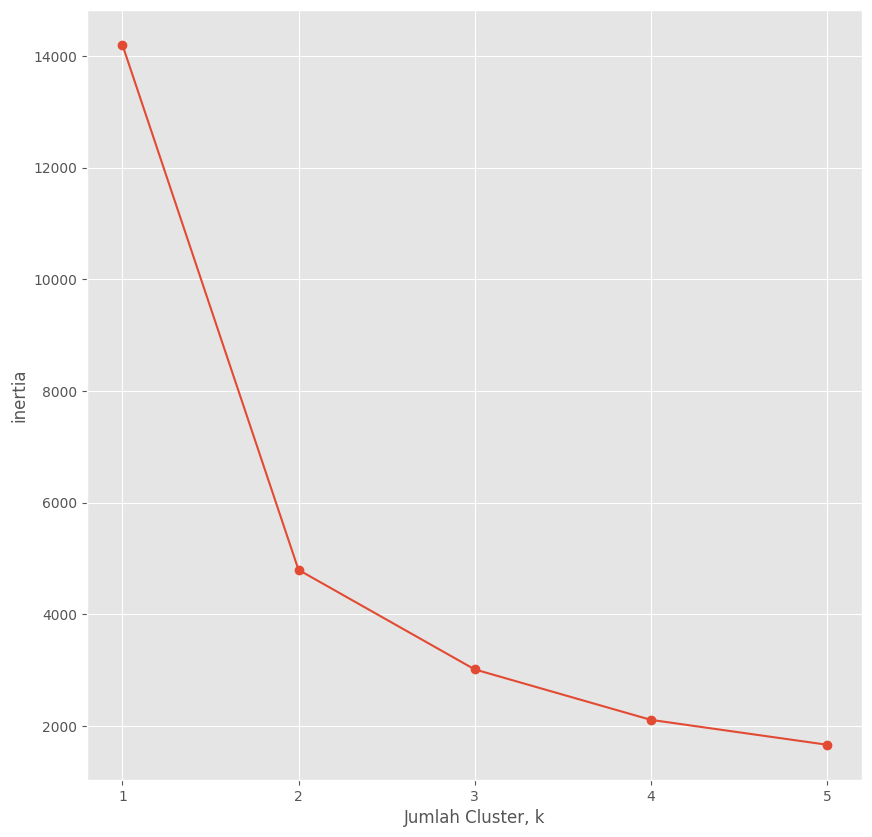

In [95]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize = (10, 10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()  